In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
r1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
r2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def getSensitivityMatrix(dataset = "BME", k = 1):
    M = np.zeros((10, 10))
    with open('Results/finals/sensitivityBME copy.txt', 'r') as file:
        for line in file:
            line = line.strip()
            pattern = r"BME\((\d+)\)"
            match = re.search(pattern, line)
            number = int(match.group(1))
            if number == k:
                words = line.split("&")
                for i in range(1, len(words)):
                    pattern = r"\(([^;]+);([^)]+)\)\s+([0-9.]+)"
                    string = words[i].strip()
                    matches = re.match(pattern, string)
                    num1 = int(float(matches.group(1))*10) - 1
                    num2 = int(float(matches.group(2))*10) - 1
                    num3 = float(matches.group(3))
                    # row index is ratio, column index is sub_ratio
                    M[num1][num2] = num3
            else:
                continue
    return M
def getSensitivityExperimentResultK(ratio = True, value = 0):
    if ratio == True:
        plt.figure(figsize=(10, 6))
        for k in range(1, 14, 2):
            M = getSensitivityMatrix(k=k)
            plt.plot(r1, M[value], marker='o', linestyle='-', label=f"k={k}")
        plt.title(f'Sensitivity Experiment With Ratio={value}')
        plt.xlabel('Subsequence Length Ratio')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.legend()
        plt.show()
    if ratio == False:
        plt.figure(figsize=(10, 6))
        for i in range(1, 14, 2):
            M = getSensitivityMatrix(k=i)
            data = [row[value] for row in M]
            plt.plot(r2, data, marker='o', linestyle='-', label=f"k={i}")
        plt.title(f'Sensitivity Experiment With Ratio={value}')
        plt.xlabel('Subsequence Length Ratio')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.legend()
        plt.show()

[[0.64 0.61 0.55 0.53 0.51 0.52 0.53 0.59 0.64 0.62]
 [0.64 0.6  0.55 0.53 0.49 0.51 0.51 0.56 0.64 0.62]
 [0.64 0.61 0.54 0.53 0.49 0.51 0.51 0.55 0.64 0.62]
 [0.64 0.61 0.54 0.52 0.49 0.49 0.51 0.55 0.63 0.62]
 [0.62 0.6  0.53 0.51 0.49 0.49 0.51 0.55 0.63 0.62]
 [0.61 0.57 0.53 0.51 0.49 0.49 0.51 0.55 0.63 0.62]
 [0.61 0.56 0.5  0.5  0.47 0.48 0.51 0.55 0.63 0.62]
 [0.59 0.53 0.48 0.48 0.47 0.47 0.49 0.55 0.63 0.62]
 [0.47 0.49 0.47 0.48 0.47 0.47 0.48 0.55 0.63 0.62]
 [0.47 0.48 0.47 0.48 0.47 0.47 0.48 0.55 0.63 0.62]]


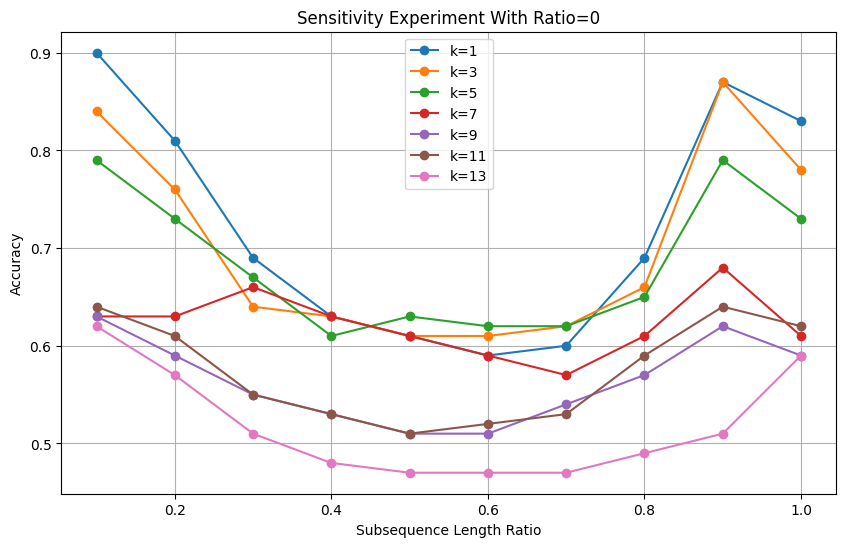

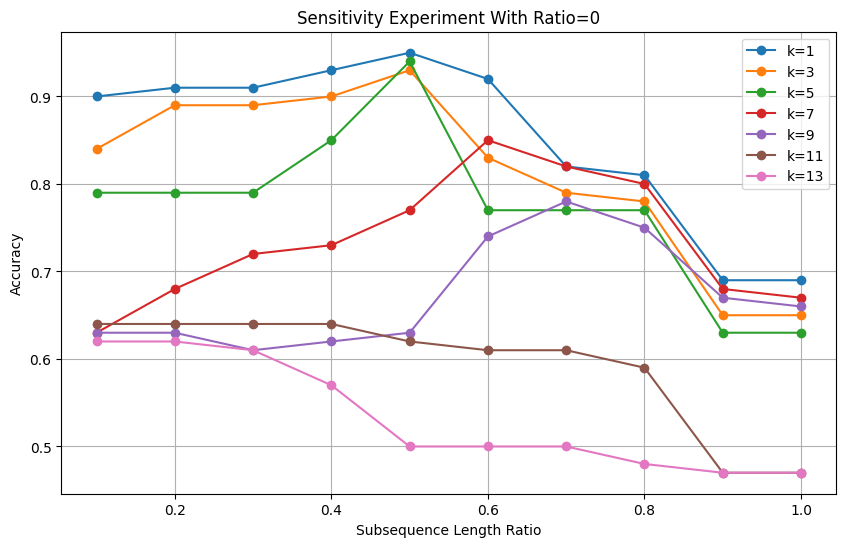

In [4]:
print(getSensitivityMatrix(k=11))
getSensitivityExperimentResultK(value=0)
getSensitivityExperimentResultK(ratio=False, value=0)